In [16]:
# Cell 1: Import Library dan Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Library berhasil di-import!")

✅ Library berhasil di-import!


In [17]:
# Cell 2: Generate Sample Dataset (jika belum punya)
# Skip ini jika sudah download dari Kaggle

np.random.seed(42)
n_samples = 1000

# Generate data rumah
data = {
    'area': np.random.randint(500, 5000, n_samples),
    'bedrooms': np.random.randint(1, 6, n_samples),
    'bathrooms': np.random.randint(1, 4, n_samples),
    'age': np.random.randint(0, 50, n_samples),
    'location_score': np.random.randint(1, 11, n_samples),
    'garage': np.random.randint(0, 3, n_samples),
}

# Generate harga berdasarkan fitur
data['price'] = (
    data['area'] * 150 + 
    data['bedrooms'] * 50000 + 
    data['bathrooms'] * 30000 - 
    data['age'] * 2000 + 
    data['location_score'] * 20000 +
    data['garage'] * 25000 +
    np.random.normal(0, 50000, n_samples)
)

# Generate kategori harga
data['price_category'] = pd.cut(data['price'], 
                                 bins=[0, 500000, 1000000, float('inf')],
                                 labels=['Low', 'Medium', 'High'])

df = pd.DataFrame(data)
df.to_csv('data/house_prices.csv', index=False)
print("✅ Dataset berhasil dibuat!")
print(f"📊 Shape: {df.shape}")
df.head()

✅ Dataset berhasil dibuat!
📊 Shape: (1000, 8)


,area,bedrooms,bathrooms,age,location_score,garage,price,price_category
0,1360,2,1,31,2,1,3.796298e+05,Low
1,4272,3,3,2,7,2,1.172828e+06,High
2,3592,1,2,2,4,1,7.787709e+05,Medium
3,966,1,2,27,1,1,1.203582e+05,Low
4,4926,2,1,43,4,0,8.609930e+05,Medium


In [18]:
df = pd.read_csv('data/house_prices.csv')

print("="*60)
print("📊 INFORMASI DATASET")
print("="*60)
print(f"\n🔢 Jumlah Data: {len(df)} baris, {len(df.columns)} kolom")
print(f"\n📋 Nama Kolom:\n{df.columns.tolist()}")
print(f"\n📈 Tipe Data:\n{df.dtypes}")
print(f"\n❓ Missing Values:\n{df.isnull().sum()}")
print(f"\n📊 Statistik Deskriptif:")
print(df.describe())

📊 INFORMASI DATASET

🔢 Jumlah Data: 1000 baris, 8 kolom

📋 Nama Kolom:
['area', 'bedrooms', 'bathrooms', 'age', 'location_score', 'garage', 'price', 'price_category']

📈 Tipe Data:
area                int64
bedrooms            int64
bathrooms           int64
age                 int64
location_score      int64
garage              int64
price             float64
price_category     object
dtype: object

❓ Missing Values:
area              0
bedrooms          0
bathrooms         0
age               0
location_score    0
garage            0
price             0
price_category    0
dtype: int64

📊 Statistik Deskriptif:
              area     bedrooms    bathrooms          age  location_score  \
count  1000.000000  1000.000000  1000.000000  1000.000000     1000.000000   
mean   2815.422000     2.990000     1.973000    24.755000        5.575000   
std    1255.514921     1.427564     0.820332    14.435004        2.901516   
min     503.000000     1.000000     1.000000     0.000000        1.00000

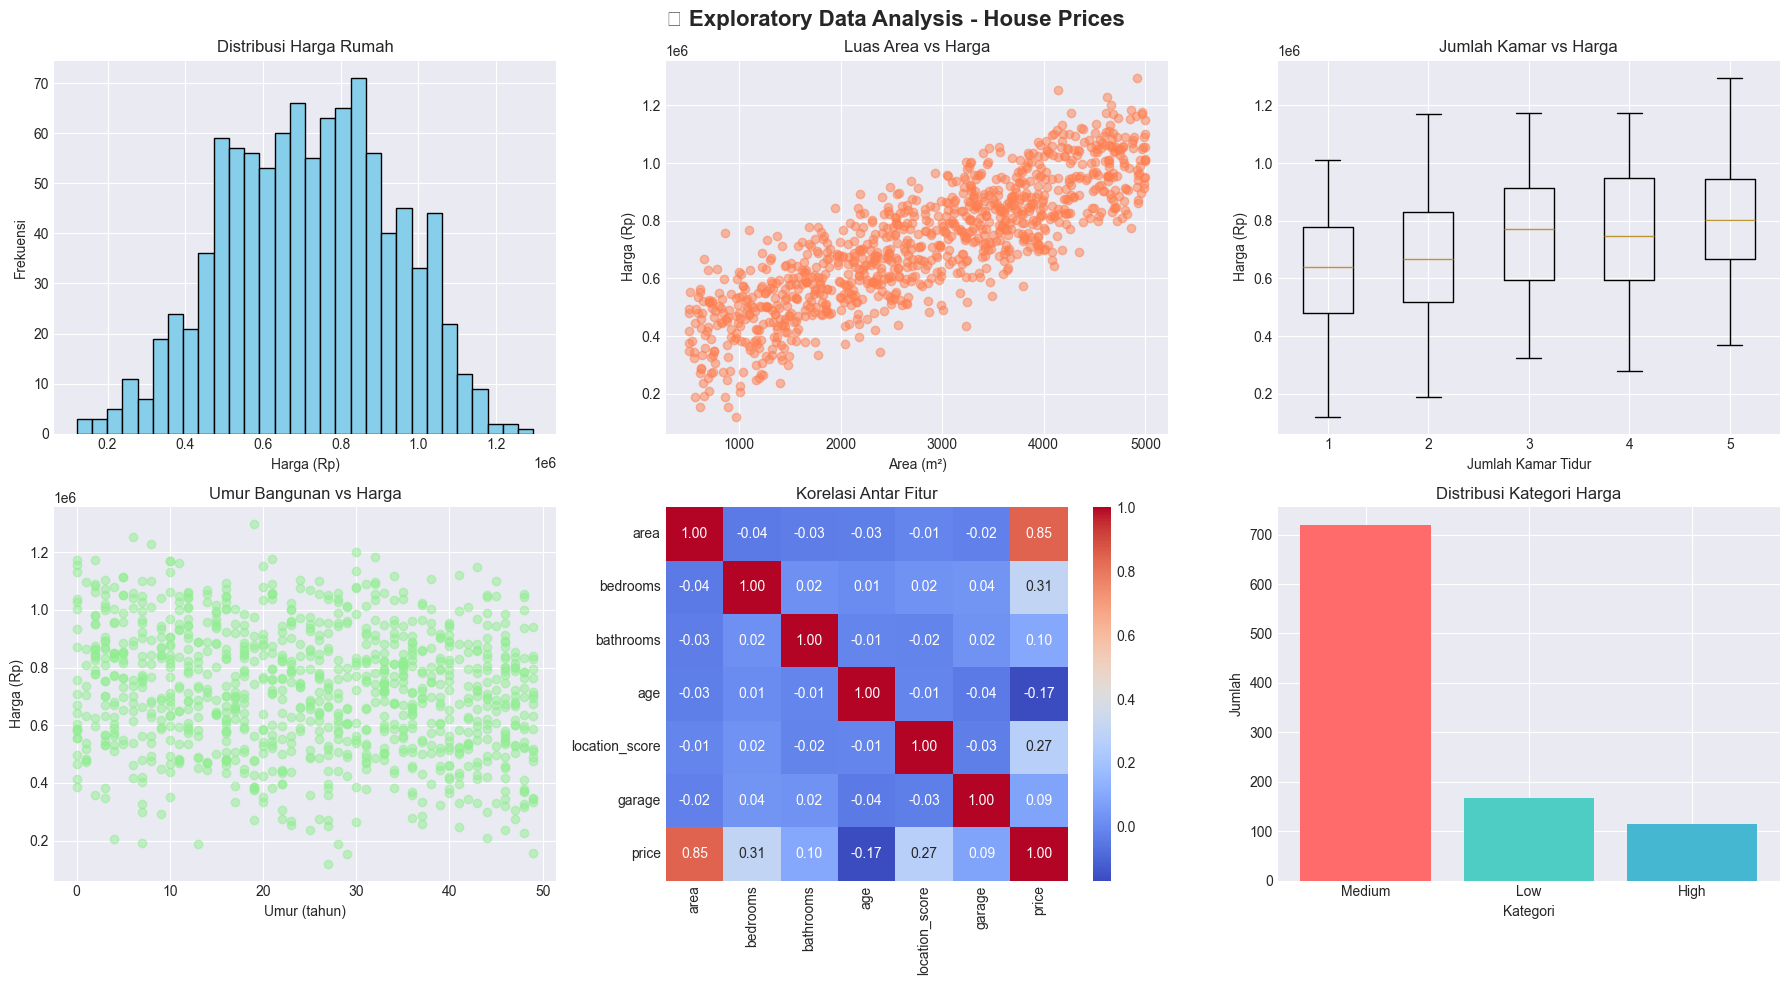

✅ Visualisasi EDA selesai dan disimpan!


In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Exploratory Data Analysis - House Prices', fontsize=16, fontweight='bold')

# Plot 1: Distribusi Harga
axes[0, 0].hist(df['price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribusi Harga Rumah')
axes[0, 0].set_xlabel('Harga (Rp)')
axes[0, 0].set_ylabel('Frekuensi')

# Plot 2: Area vs Price
axes[0, 1].scatter(df['area'], df['price'], alpha=0.5, color='coral')
axes[0, 1].set_title('Luas Area vs Harga')
axes[0, 1].set_xlabel('Area (m²)')
axes[0, 1].set_ylabel('Harga (Rp)')

# Plot 3: Bedrooms vs Price
axes[0, 2].boxplot([df[df['bedrooms']==i]['price'].values for i in range(1, 6)])
axes[0, 2].set_title('Jumlah Kamar vs Harga')
axes[0, 2].set_xlabel('Jumlah Kamar Tidur')
axes[0, 2].set_ylabel('Harga (Rp)')

# Plot 4: Age vs Price
axes[1, 0].scatter(df['age'], df['price'], alpha=0.5, color='lightgreen')
axes[1, 0].set_title('Umur Bangunan vs Harga')
axes[1, 0].set_xlabel('Umur (tahun)')
axes[1, 0].set_ylabel('Harga (Rp)')

# Plot 5: Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Korelasi Antar Fitur')

# Plot 6: Price Category Distribution
price_cat_counts = df['price_category'].value_counts()
axes[1, 2].bar(price_cat_counts.index, price_cat_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 2].set_title('Distribusi Kategori Harga')
axes[1, 2].set_xlabel('Kategori')
axes[1, 2].set_ylabel('Jumlah')

plt.tight_layout()
plt.savefig('images/eda_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualisasi EDA selesai dan disimpan!")

In [20]:
print("="*60)
print("🎯 MODEL 1: REGRESSION - Prediksi Harga Rumah")
print("="*60)

# Pilih fitur dan target
feature_cols = ['area', 'bedrooms', 'bathrooms', 'age', 'location_score', 'garage']
X_reg = df[feature_cols]
y_reg = df['price']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Normalisasi data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"✅ Data Training: {X_train_reg.shape}")
print(f"✅ Data Testing: {X_test_reg.shape}")

🎯 MODEL 1: REGRESSION - Prediksi Harga Rumah
✅ Data Training: (800, 6)
✅ Data Testing: (200, 6)


In [21]:
print("\n🔄 Training Linear Regression Model...")

lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

# Prediksi
y_pred_lr = lr_model.predict(X_test_reg_scaled)

# Evaluasi
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print(f"✅ Linear Regression - RMSE: {rmse_lr:,.2f}")
print(f"✅ Linear Regression - R² Score: {r2_lr:.4f}")


🔄 Training Linear Regression Model...
✅ Linear Regression - RMSE: 45,865.97
✅ Linear Regression - R² Score: 0.9450


In [22]:
# Cell 7: Training Model Regression - Random Forest
print("\n🔄 Training Random Forest Regression Model...")

rf_reg_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_reg_model.fit(X_train_reg_scaled, y_train_reg)

# Prediksi
y_pred_rf = rf_reg_model.predict(X_test_reg_scaled)

# Evaluasi
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print(f"✅ Random Forest - RMSE: {rmse_rf:,.2f}")
print(f"✅ Random Forest - R² Score: {r2_rf:.4f}")

# Pilih model terbaik
if r2_rf > r2_lr:
    best_reg_model = rf_reg_model
    best_model_name = "Random Forest"
    best_r2 = r2_rf
    best_rmse = rmse_rf
    y_pred_best = y_pred_rf
else:
    best_reg_model = lr_model
    best_model_name = "Linear Regression"
    best_r2 = r2_lr
    best_rmse = rmse_lr
    y_pred_best = y_pred_lr

print(f"\n🏆 Model Terbaik: {best_model_name}")
print(f"📊 R² Score: {best_r2:.4f} ({best_r2*100:.2f}%)")
print(f"📊 RMSE: Rp {best_rmse:,.2f}")


🔄 Training Random Forest Regression Model...
✅ Random Forest - RMSE: 63,495.49
✅ Random Forest - R² Score: 0.8947

🏆 Model Terbaik: Linear Regression
📊 R² Score: 0.9450 (94.50%)
📊 RMSE: Rp 45,865.97


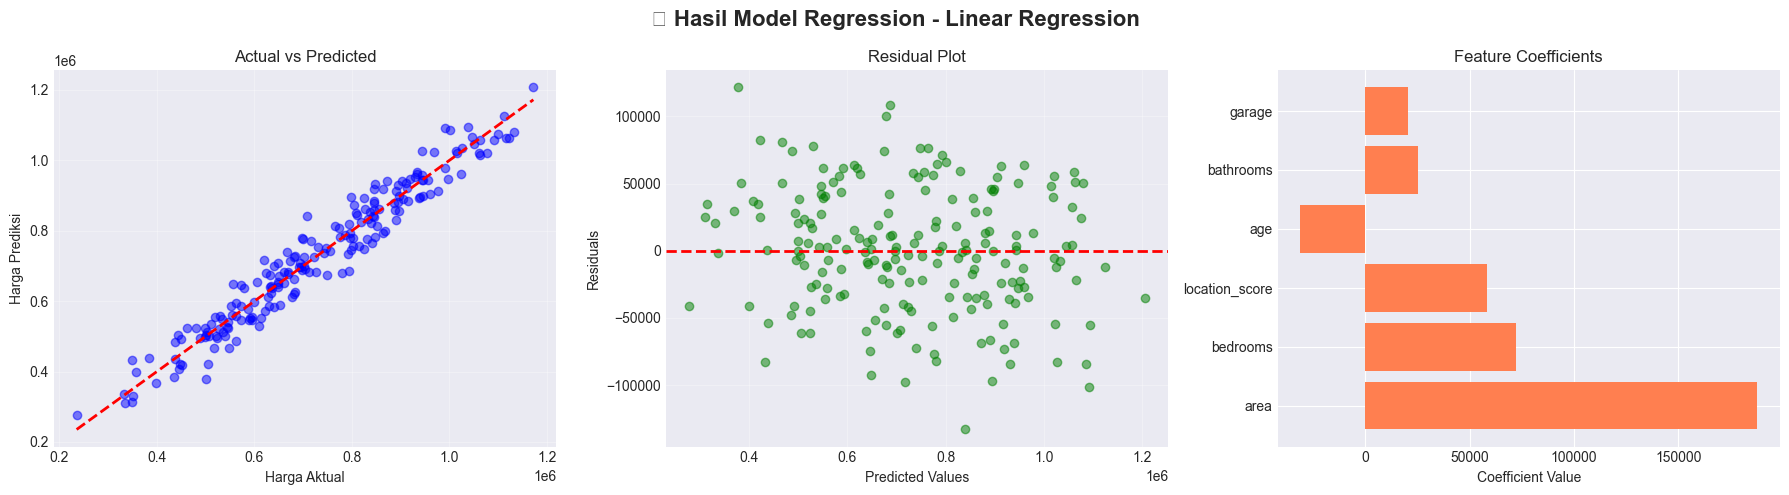

✅ Visualisasi hasil regression selesai!


In [23]:
# Cell 8: Visualisasi Hasil Regression
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f'📊 Hasil Model Regression - {best_model_name}', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_best, alpha=0.5, color='blue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Harga Aktual')
axes[0].set_ylabel('Harga Prediksi')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Plot 2: Residual Plot
residuals = y_test_reg - y_pred_best
axes[1].scatter(y_pred_best, residuals, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

# Plot 3: Feature Importance (jika Random Forest)
if best_model_name == "Random Forest":
    importances = best_reg_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    axes[2].barh(range(len(importances)), importances[indices], color='coral')
    axes[2].set_yticks(range(len(importances)))
    axes[2].set_yticklabels([feature_cols[i] for i in indices])
    axes[2].set_xlabel('Importance')
    axes[2].set_title('Feature Importance')
else:
    coefficients = best_reg_model.coef_
    indices = np.argsort(np.abs(coefficients))[::-1]
    axes[2].barh(range(len(coefficients)), coefficients[indices], color='coral')
    axes[2].set_yticks(range(len(coefficients)))
    axes[2].set_yticklabels([feature_cols[i] for i in indices])
    axes[2].set_xlabel('Coefficient Value')
    axes[2].set_title('Feature Coefficients')

plt.tight_layout()
plt.savefig('images/regression_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualisasi hasil regression selesai!")

In [10]:
# Cell 9: Simpan Model Regression
joblib.dump(best_reg_model, 'models/regression_model.pkl')
joblib.dump(scaler_reg, 'models/scaler_regression.pkl')

print("✅ Model Regression dan Scaler disimpan!")

✅ Model Regression dan Scaler disimpan!


In [11]:
# Cell 10: Persiapan Data untuk Classification
print("="*60)
print("🎯 MODEL 2: CLASSIFICATION - Kategori Harga")
print("="*60)

# Encode target
le = LabelEncoder()
y_class = le.fit_transform(df['price_category'])

# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_reg, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Normalisasi
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print(f"✅ Data Training: {X_train_class.shape}")
print(f"✅ Data Testing: {X_test_class.shape}")
print(f"✅ Kelas: {le.classes_}")

🎯 MODEL 2: CLASSIFICATION - Kategori Harga
✅ Data Training: (800, 6)
✅ Data Testing: (200, 6)
✅ Kelas: ['High' 'Low' 'Medium']


In [12]:
# Cell 11: Training Model Classification
print("\n🔄 Training Random Forest Classification Model...")

rf_class_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_class_model.fit(X_train_class_scaled, y_train_class)

# Prediksi
y_pred_class = rf_class_model.predict(X_test_class_scaled)

# Evaluasi
accuracy = accuracy_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class, target_names=le.classes_)

print(f"✅ Akurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\n📊 Classification Report:\n{report}")


🔄 Training Random Forest Classification Model...
✅ Akurasi Model: 0.9000 (90.00%)

📊 Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.74      0.81        23
         Low       0.84      0.79      0.81        33
      Medium       0.91      0.95      0.93       144

    accuracy                           0.90       200
   macro avg       0.88      0.83      0.85       200
weighted avg       0.90      0.90      0.90       200



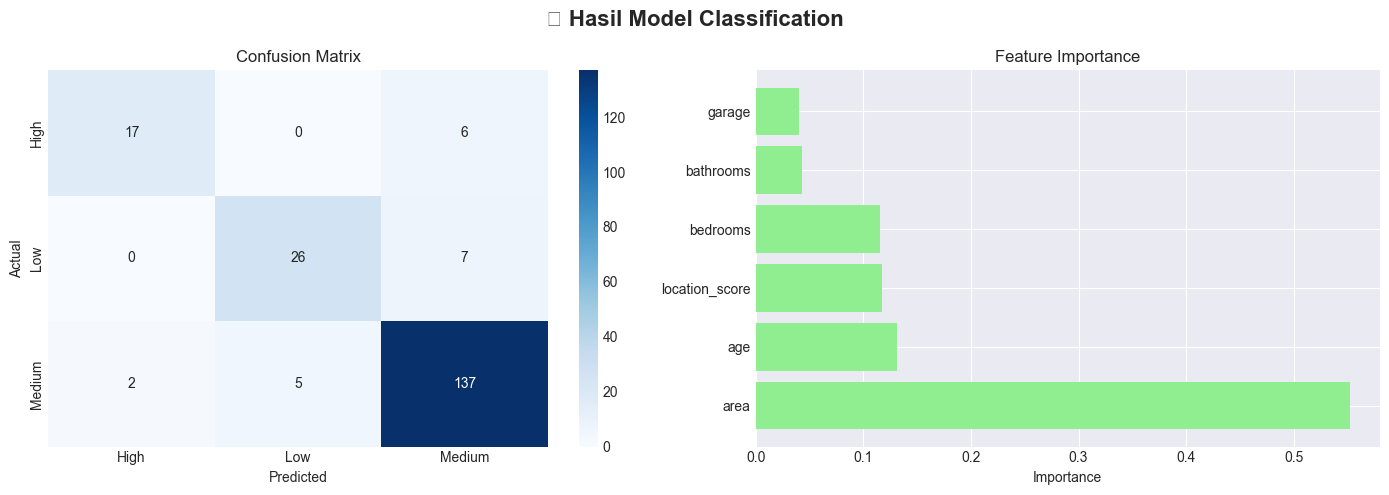

✅ Visualisasi hasil classification selesai!


In [13]:
# Cell 12: Visualisasi Hasil Classification
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('📊 Hasil Model Classification', fontsize=16, fontweight='bold')

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Feature Importance
importances = rf_class_model.feature_importances_
indices = np.argsort(importances)[::-1]
axes[1].barh(range(len(importances)), importances[indices], color='lightgreen')
axes[1].set_yticks(range(len(importances)))
axes[1].set_yticklabels([feature_cols[i] for i in indices])
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.savefig('images/classification_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualisasi hasil classification selesai!")

In [24]:
# Cell 13: Simpan Model Classification
joblib.dump(rf_class_model, 'models/classification_model.pkl')
joblib.dump(scaler_class, 'models/scaler_classification.pkl')
joblib.dump(le, 'models/label_encoder.pkl')

print("✅ Model Classification, Scaler, dan Label Encoder disimpan!")

✅ Model Classification, Scaler, dan Label Encoder disimpan!


In [15]:
import os

# Cek struktur folder
print("Current directory:", os.getcwd())
print("\nFolder structure:")
for root, dirs, files in os.walk('.'):
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f'{subindent}{file}')

Current directory: D:\liburr\ML_Project_Praktikum

Folder structure:
./
  desktop_app.py
  house_prices.csv
  ML_Project_Development.ipynb
  .ipynb_checkpoints/
    ML_Project_Development-checkpoint.ipynb
  data/
    house_prices.csv
  images/
    classification_results.png
    eda_visualization.png
    regression_results.png
  models/
    classification_model.pkl
    label_encoder.pkl
    regression_model.pkl
    scaler_classification.pkl
    scaler_regression.pkl
